## The Notebook Involves in Data Analysis for Flight Price of Indian Airline Carriers, created a dashboard for ticket price in India by the help of tableau and also testing out the best Model for the regression analysis.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

In [4]:
from plotly.subplots import make_subplots

In [5]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Clean_Dataset.csv')

In [6]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
data = data.drop('Unnamed: 0',axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [9]:
data.isna().any()

airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [10]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
#Number of flights operating per each airline
data['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [12]:
# vistara is operating most of the routes

In [13]:
price_by_airline = data.groupby('airline').mean()['price']
airline = [i for i,df in data.groupby('airline')]

<ipython-input-13-926923a646b5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_by_airline = data.groupby('airline').mean()['price']


In [14]:
#variation of prices across the airlines
px.bar(x = airline,y=price_by_airline,color=price_by_airline,width=800,height=400,labels={
                     "x": "Airline",
                     "y": "Average Ticket Price"
                 })

Vistara is the most Pricey Airline Followed by Air India

<Axes: xlabel='airline', ylabel='price'>

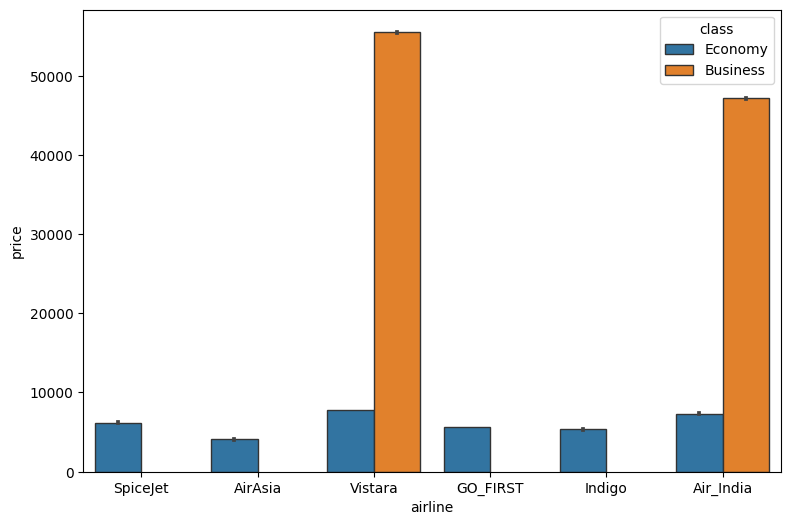

In [15]:
#difference between price of economy and business class
plt.figure(figsize=(9,6))
sns.barplot(x = 'airline',y='price',data = data,hue = 'class',edgecolor=".2")

In [16]:
#lets see which source city is more frequently served
count_by_source = data.groupby('source_city').count()['airline']
source_city = [i for i,df in data.groupby('source_city')]
px.pie(values = count_by_source,names=source_city,color_discrete_sequence=px.colors.sequential.dense,width=600,height=400)

In [17]:
#lets see which destination city is more frequently served
count_by_source = data.groupby('destination_city').count()['airline']
destination_city = [i for i,df in data.groupby('destination_city')]
px.pie(values = count_by_source,names=destination_city,color_discrete_sequence=px.colors.sequential.deep,width=600,height=400)

In [18]:
#Which Route is the bussiest route
route = data.groupby(['source_city','destination_city']).count()['airline']

In [19]:
route = pd.DataFrame(route)

In [20]:
route = route.reset_index()

In [21]:
#top 5 most busy routes
route.sort_values(by = 'airline',ascending=False).head()

,source_city,destination_city,airline
14,Delhi,Mumbai,15289
27,Mumbai,Delhi,14809
10,Delhi,Bangalore,14012
1,Bangalore,Delhi,13756
4,Bangalore,Mumbai,12939


Delhi and bombay are most busiest airports

In [22]:
#What are the times at which the cities are operating most of their flights
departure_time = data.groupby('departure_time').count()['airline']
cities = [i for i,df in data.groupby('departure_time')]
px.line(x = cities,y = departure_time,width=900,height=400,labels={'x':"Time of depdarture",'y':'Operating count'},markers=True)

In [ ]:
#individual cities and their operating times
cities = [i for i,df in data.groupby('source_city')]
fig = go.Figure()
for i in cities:
    values = data[data['source_city']==i]
    dep_time = [i for i,df in values.groupby('departure_time')]
    values = list(values.groupby('departure_time').count()['airline'].values)
    fig.add_trace(go.Scatter(
    x=dep_time,
    y=values,name = i))
fig.update_layout(
    width=1000,
    height=500,
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
#Price of ticket based on time of departure
price_by_dep_time = data.groupby('departure_time').mean()['price']
dep_time = [i for i,df in data.groupby('departure_time')]
values = list(price_by_dep_time.values)

In [ ]:
px.bar(x = dep_time,y = values,color = values)
#flights in the latenight are the cheapest

In [ ]:
#lets consider a source and a destination and check which is the operator that is operating most number of services in that route

In [ ]:
#How does the source city affect the price
fig = make_subplots(rows=1,cols=2)
source_city = list(data.groupby('source_city').mean()['price'].values)
source_cities = [i for i,df in data.groupby('source_city')]
destination_city = list(data.groupby('destination_city').mean()['price'].values)
destination_cities = [i for i,df in data.groupby('destination_city')]
fig.add_trace(go.Bar(y = source_city, x = source_cities,name = "source"),row=1,col=1)
fig.add_trace(go.Bar(y = destination_city, x = destination_cities,name = "destination"),row=1,col=2)

Delhi is the cheapest destination/Source to travel for/from and chennai is the most expensive place to reach or to travel from

# Tableau Dashboard for Ticket Prices in INDIA

In [67]:
%%HTML
<div class='tableauPlaceholder' id='viz1660245509332' style='position: relative'><noscript><a href='#'><img alt='Flight Prices in INDIA      -
How much costs a ticket price is ? ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fl&#47;FlightsPricesInINDIA&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'>
    <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' />
    <param name='path' value='views&#47;FlightsPricesInINDIA&#47;Dashboard1?:language=en-GB&amp;:embed=true' /> <param name='toolbar' value='yes' />
    <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Fl&#47;FlightsPricesInINDIA&#47;Dashboard1&#47;1.png' />
    <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' />
    <param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1660245509332');                    var vizElement = divElement.getElementsByTagName('object')[0];
    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='620px';vizElement.style.maxWidth='1250px';vizElement.style.width='100%';vizElement.style.minHeight='1087px';vizElement.style.maxHeight='1287px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';}
    else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='620px';vizElement.style.maxWidth='1250px';vizElement.style.width='100%';vizElement.style.minHeight='1087px';vizElement.style.maxHeight='1287px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';}
    else { vizElement.style.width='100%';vizElement.style.height='2127px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### How does the number of stops effect the price??

In [68]:
data['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [69]:
data_copy = data.copy()

<Axes: xlabel='stops', ylabel='price'>

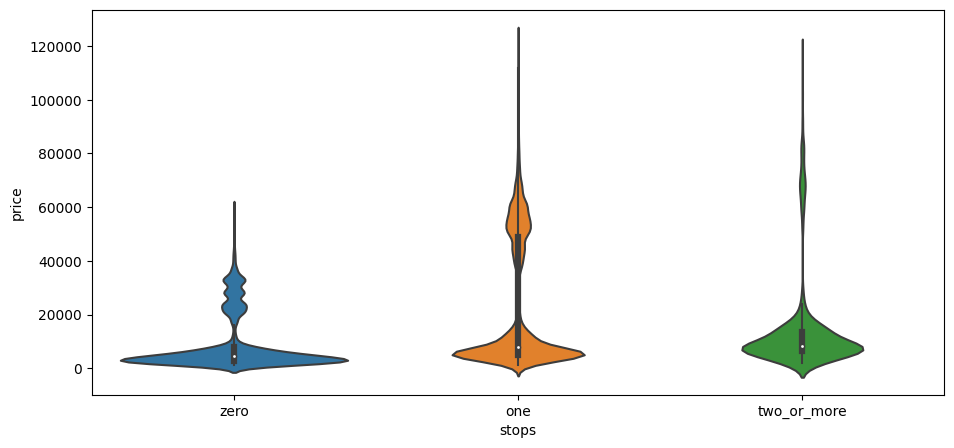

In [70]:
plt.figure(figsize=(11,5))
sns.violinplot(x = data_copy['stops'],y = data_copy['price'])

There are 2 bumps in each distribustions in each case beacuse we have business and economy classes

In [71]:
#we cannot go by this beacuse business class might drag the prices up
data_copy.groupby('stops').mean()

<ipython-input-71-be7aefce9e35>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,duration,days_left,price
stops,,,
one,13.496514,26.073893,22900.992482
two_or_more,15.317141,24.831176,14113.450775
zero,2.191324,25.956060,9375.938535


In [72]:
data_copy = data_copy.groupby(['stops','class']).mean().reset_index()

<ipython-input-72-a0cc94092590>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [73]:
economy = data_copy[data_copy['class']=='Economy']
businesss = data_copy[data_copy['class']=='Business']

In [74]:
economy

,stops,class,duration,days_left,price
1,one,Economy,12.840230,26.224710,6812.857800
3,two_or_more,Economy,15.402871,24.930427,9142.264279
5,zero,Economy,2.163351,26.042398,4012.624615


In [75]:
fig = make_subplots(rows=1,cols=2)
fig.add_trace(go.Bar(x = list(economy['stops']),y = economy['price']),row=1,col=1)
fig.add_trace(go.Bar(x = businesss['stops'],y = businesss['price']),row=1,col=2)

More stops will lead to more expensive ticket fares and that can be clearly seen above

lets see how the number of days left affect the price

In [76]:
price = list(data.groupby('days_left').mean()['price'].values)
days = [i for i,df in data.groupby('days_left')]
px.scatter(x = days,y = price,color=price,labels = {'x':'Days_left','y':'Price'})

<ipython-input-76-842367b8ddc2>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Just one day before the price has fallen drastically to fill the empty seats and to get at a cheaper rate we should book our tickets atleast 20 days before the journey

lets see how duration affects the price

In [77]:
#To get some stable obesrvations lets check the relation when the days left are atleast 20
data_copy = data[data['days_left']>20]

In [78]:
values = list(data_copy.groupby('duration').mean()['price'].values)
duration = [i for i,df in data_copy.groupby('duration')]

<ipython-input-78-4822ce675750>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [79]:
px.scatter(x = duration,y = values,color=duration)

Clearly there are some oultier beacuse it wont take 30 hours to reach from one place to other via plane atleast in india... LOL

In [80]:
#airline and the frequent operator

In [81]:
grouped = data.groupby(['source_city','destination_city','airline']).count()['duration']

In [82]:
grouped = pd.DataFrame(grouped)
grouped = grouped.reset_index()

In [83]:
grouped

,source_city,destination_city,airline,duration
0,Bangalore,Chennai,AirAsia,138
1,Bangalore,Chennai,Air_India,1610
2,Bangalore,Chennai,GO_FIRST,369
3,Bangalore,Chennai,Indigo,282
4,Bangalore,Chennai,SpiceJet,58
...,...,...,...,...
172,Mumbai,Kolkata,Air_India,3478
173,Mumbai,Kolkata,GO_FIRST,1150
174,Mumbai,Kolkata,Indigo,1690
175,Mumbai,Kolkata,SpiceJet,973


In [84]:
source_cities = list(grouped['source_city'].unique())

In [85]:
source_cities

['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']

In [86]:
destination_cities = list(grouped['destination_city'].unique())

In [87]:
destination_cities

['Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Bangalore']

In [88]:
data.iloc[0].values[0]

'SpiceJet'

In [38]:
empty_data = pd.DataFrame(columns=['source','destination','airline'])
count = 0
for index,i in enumerate(source_cities):
    destinations = [j for j in destination_cities if j not in [i]]
    test_data = data[data['source_city']==i]
    for dest in destinations:
        work = test_data.copy()
        work = work[work['destination_city']==dest]
        airline = work.sort_values(by = 'duration',ascending=False).iloc[0].values[0]
        empty_data.loc[count] = [i,dest,airline]
        count+=1

In [39]:
empty_data.head()

,source,destination,airline
0,Bangalore,Chennai,Air_India
1,Bangalore,Delhi,Air_India
2,Bangalore,Hyderabad,Air_India
3,Bangalore,Kolkata,Vistara
4,Bangalore,Mumbai,Vistara


In [40]:
px.pie(empty_data,names = list(empty_data['airline'].value_counts().index) ,values = list(empty_data['airline'].value_counts().values),width=600,height=400)

out of 29 Routes that we have 66% of the routes have Air India as the most operated airline followed by vistara

### Model Creation

In [41]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


We will be using the following regression algorithims
1. Linear regression
2. KNN Regressor
3. Gradient Boost Regressor
4. XG Boost Regressor
5. Decesion Tree Regressor
6. SVM Regression

In [42]:
#Lets encode the categorical data into numerical data

In [43]:
final_data = data.copy()

In [44]:
final_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
for i in final_data.select_dtypes('object').columns:
    encoder = LabelEncoder()
    final_data[i] = encoder.fit_transform(data[i])

In [48]:
final_data.drop('flight',axis=1,inplace=True)

In [91]:
final_data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


In [92]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('price',axis=1),final_data['price'], test_size=0.33, random_state=42)

In [93]:
#importing all the models

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

##### Kfold Cross Validation on all the models(Using a kfold of size = 5)

In [94]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [95]:
models = {}

models["KNeighborsRegressor"]={"model":KNeighborsRegressor(n_neighbors=50)}
models["LinearRegression"]={"model":LinearRegression()}
models["XGBRegressor"]={"model":xgb.XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)}
models["RandomForestRegressor"]={"model":RandomForestRegressor(n_estimators=50,max_depth=10)}
models['GradientBoostingRegressor'] = {'model':GradientBoostingRegressor(n_estimators=50,max_depth=10)}

In [96]:
X = final_data.drop('price',axis=1)
y = final_data['price']

### Manual KFold Cross Validation

In [97]:
# def get_score(model,xtrain,xtest,ytrain,ytest):
#     model.fit(xtrain,ytrain)
#     score = model.socre(xtest,ytest)
#     return score

# for train_index,test_index in cv.split(X,y):
#     xtrain = X.loc[train_index]
#     ytrain = y.loc[train_index]
#     xtest = X.loc[test_index]
#     ytest = y.loc[test_index]
#     print(get_scores(model,xtrain,xtest,ytrain,ytest))

### Automatic Kfold Cross validation

In [98]:
#cross validation to get the best model
cv = KFold(n_splits=5)
for key,item in models.items():
    reg_model = item['model']
    print(item['model'])
    score = cross_val_score(estimator=reg_model,X = X,y = y,cv=cv,scoring='r2')
    print(score)

KNeighborsRegressor(n_neighbors=50)
[-2.10735025e+01 -3.51099569e+01 -3.31673997e+01 -2.40572904e-02
 -9.31749582e+00]
LinearRegression()
[-0.2069986  -0.2036236  -0.15840652  0.83777416  0.07672315]
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=5, num_parallel_tree=None, predictor=None,
             random_state=1, ...)
[0.57915368 0.59646649 0.60685763 0.89270365 0.18023227]
RandomFores

In [ ]:
#Clearly the Gradient Boosting algorithm does better in estimating, let us explore

In [99]:
reg_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=50)

In [114]:
predicted = reg_model.predict(X_test)

In [115]:
predicted

array([ 5325.94448707, 70467.26589711,  7536.18203596, ...,
        4246.17415441,  6529.11801318, 11602.35453439])

In [116]:
actual_values = y_test.values

In [117]:
actual_values

array([ 7366, 64831,  6195, ...,  5511,  5760, 11129])

In [118]:
from sklearn.metrics import mean_absolute_error

In [119]:
mean_absolute_error(actual_values,predicted)

1922.6616992188258

In [120]:
reg_model.score(X_test,y_test)

0.9760961278641936

#### Hyper parameter tuning using gridsearch cv

In [107]:
#The below code has already been implemented so we directly use the best parameters

In [108]:
# grid_params = {'min_samples_split':[1,2,3,4],'min_samples_leaf':[1,2,3],'max_depth':[4,6,8,10],'n_estimators':[40,50,100]}

# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=grid_params,n_jobs=-1,verbose=3)

# grid.fit(X_train,y_train)

In [109]:
# best parameters are
# {'max_depth': 10,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'n_estimators': 100}

In [121]:
final_model = GradientBoostingRegressor(max_depth=100,min_samples_leaf=1,min_samples_split=2,n_estimators=100)

In [122]:
final_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=100)

In [123]:
final_model.score(X_test,y_test)

0.9761089137353467

In [124]:
#Final predictions
Predictions = final_model.predict(X_test)
Actual = y_test.values

<Axes: >

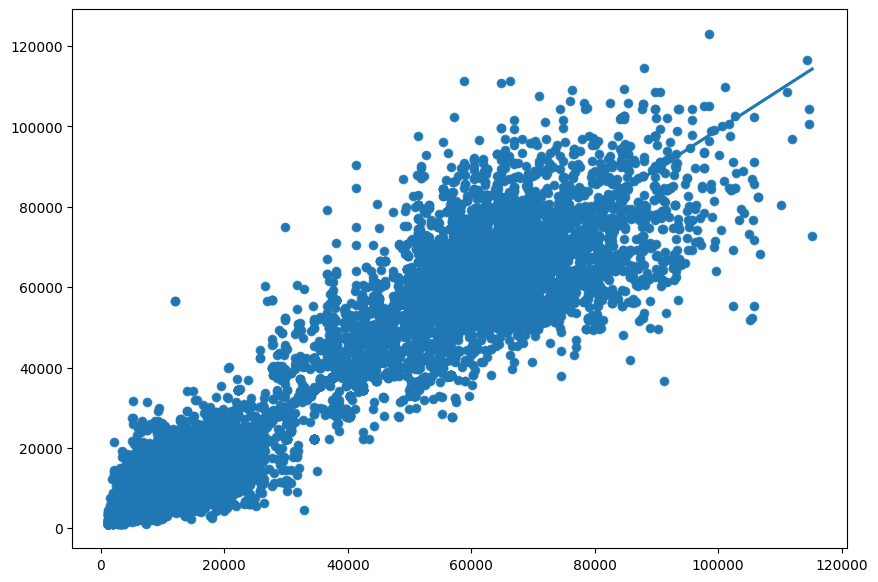

In [125]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = Actual,y = Predictions)
sns.regplot(x = Actual,y = Predictions)

In [126]:
#Most of the data is along the reg fit but may be due to cause of some outliers some predictions are off

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
